In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
df = pd.read_csv("superstore.csv")

In [3]:
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df.head())

(51290, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Categories      51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  object 
 6   Market          51290 non-null  object 
 7   ???             51290 non-null  object 
 8   Date            51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product         51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  object 
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           512

In [4]:
df = df.drop_duplicates()

In [6]:
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')

# Now you can fill NaNs with median
df['Discount'].fillna(df['Discount'].median(), inplace=True)

In [10]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [11]:
df['Sales'] = df['Sales'].astype(str).str.replace(',', '', regex=False)
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Drop rows where Date is NaT
df = df.dropna(subset=['Date'])

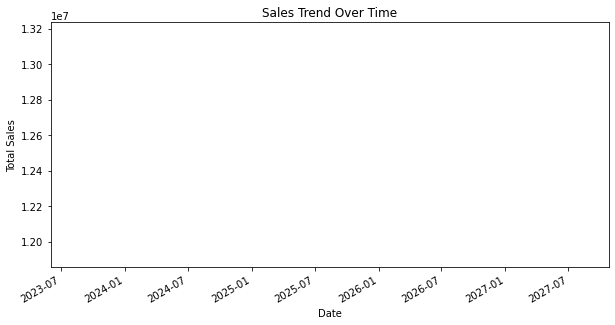

In [12]:
plt.figure(figsize=(10,5))
df.groupby('Date')['Sales'].sum().plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

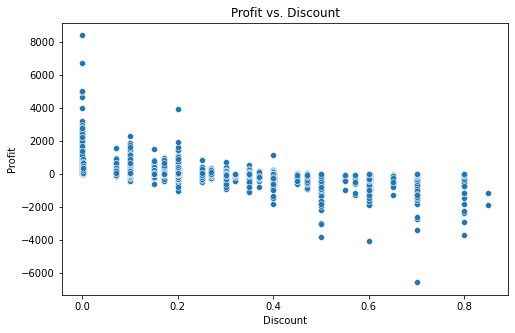

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Profit vs. Discount")
plt.show()

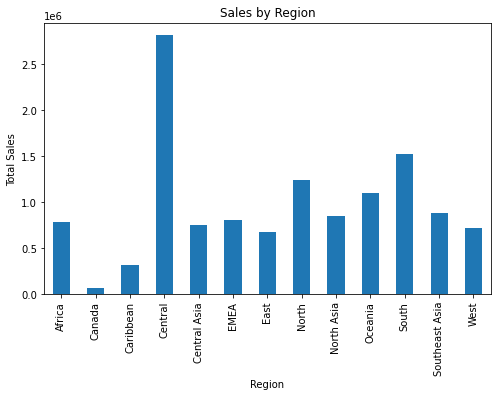

In [14]:
plt.figure(figsize=(8,5))
df.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.show()

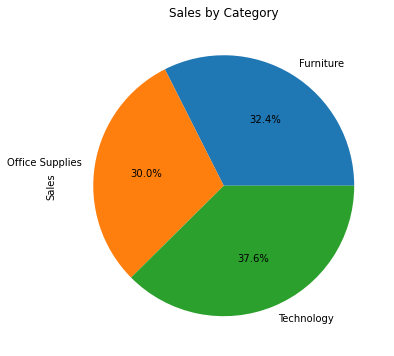

In [16]:
df.groupby('Categories')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Sales by Category")
plt.show()

In [17]:
X = df[['Profit', 'Discount']]
y = df['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.23342030799352864
RMSE: 390.4506556761354
